<a href="https://colab.research.google.com/github/khalil753/Bio-Project/blob/master/1_Data2Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comment before using the notebbok**

This notebook was written to change the format of the datasets, from the one provided by the professor, to the one compatible with the fastai library. Therefore, this notebook is only to be run if the datasets are stored in the specific format provided to me by the professor, that is, saved as npy files with the names:

X_test.npy

X_train.npy

Y_test.npy

Y_train.npy

Where they stored in some other format, this notebook wouldn't work.


# **Instructions of use of the Notebook**

To make use of this notebook, only two modifications need to be made t in the last cell of the "Mounting libraries and defining global variables" section:

1-Modify the "path" variable: This variable should hold the path of the project file. All of the files created in this or other notebooks will be saved in this path.

2-Modify the "path_numpy_datasets" variable: This varible should cointain the path containing the datasets stored as npy files.

After having modified both variables, one may simple run the entire notebook.

# **Mounting libraries and defining global variables**

In [ ]:
import fastai
from fastai.vision import *
from fastai.widgets import *

import numpy as np
import pandas as pd

from pathlib import Path
import os
from os import listdir

import matplotlib as mpl
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import tensor

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Before running the notebook one must modify the "path" variable and the "path_numpy_datasets" variable. Uncomment the variables after having done the modifications.

In [ ]:
#path = Path(r"Insert here the project file's path")
#path_numpy_datasets = Path(r"Insert here the path in which the npy files are found")
path_data = path/'data'
classes = ['healthy', 'tumor', 'injury']

# **Loading the data**

## As numpy arrays

In [ ]:
files = listdir(path_numpy_datasets)
for file in files:
  file = Path(file)
  if file.suffix == '.npy':
    file_stem = str(file.stem)
    if not(file_stem == 'real_classes_test' or file_stem == 'real_classes_train'): 
      print(file)
      exec(f'{file_stem} = np.load(path/file, allow_pickle = True)')
X_val = X_test
Y_val = Y_test

X_train.npy
X_test.npy
Y_train.npy
real_classes_test.npy
Y_test.npy
real_classes_train.npy


## Transforming the data into rgb [0:255]

To save the arrays as png images, they must contain integers from 0 to 255. the changeRGBtype function takes care of that.

In [ ]:
def flatten(X):
    org_shape = X.shape
    n_pixel = torch.tensor(org_shape[1:]).prod().item()
    X = X.view((-1,n_pixel))
    return X, org_shape

def changeRGBtype(X):
  X = torch.tensor(X)
  X, org_shape = flatten(X)
  X -= X.min(axis=1)[0].unsqueeze(-1)
  X /= 2
  X *= 255
  return np.array(X.view(org_shape)).astype(np.uint8)


In [ ]:
X_val = changeRGBtype(X_val)
X_train = changeRGBtype(X_train)

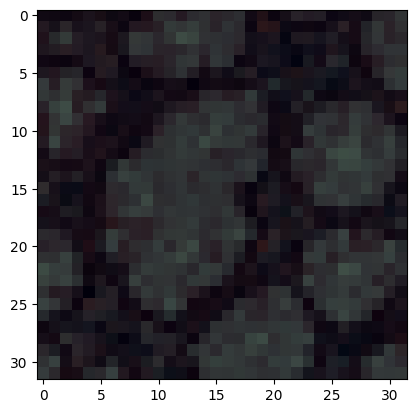

In [ ]:
imshow(X_val[3])

# **Saving Images in folders**

These functions create the folder structure and save the images there. The structure consists of two folders, onw called train and other called val, for training and validation images respectively. Inside of each, there's a folder for each class, namely, healthy, tumor and injury.

In [ ]:
def create_folders(path, fnames, classes):
  for name in fnames:
    if not os.path.isdir(path/name): 
      os.mkdir(path/name)      
    for label in classes:
      if not os.path.isdir(path/name/label):     
        os.mkdir(path/name/label)

def save_imgs(path, X, y, classes):
  labels = map(lambda x: classes[x], y)
  c = len(classes)
  count = dict([*zip(classes, np.zeros(c, dtype=np.int))])
  for x, label in zip(X, labels):
    im = Image.fromarray(x)
    count[label] += 1
    n_class = count[label]
    path_img = path/label/f'{n_class}.png'
    if not os.path.isfile(path_img): im.save(path_img) 

In [ ]:
def npdata2folder(path, X_train, y_train, X_val, y_val, classes):
  fnames = ['val', 'train']
  create_folders(path, fnames, classes)

  data_sets = [X_val, X_train]
  data_labels = [y_val, y_train]
  for X, y, fname in zip(data_sets, data_labels, fnames):   
    save_imgs(path/fname, X, y, classes)

In [ ]:
path_data = path/'data'
if not os.path.isdir(path_data): os.mkdir(path_data) 

n = -1
npdata2folder(path_data, X_train[:n], Y_train[:n], X_val[:n], Y_val[:n], classes)